In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
train = pd.read_json("train.json", lines=True)
test = pd.read_json("test.json", lines=True)
sub = pd.read_csv("sample_submission.csv")

In [4]:
def dico_nbr(lst):
    """
    """
    seq_list = []
    for b in lst :
        if b not in lst:
            lst.append(b)

    dico = {}

    for b in lst:
        dico[b] = lst.count(b)
    
    return dico



def max_dstrb_df(df, col):
    """
    fonction pour faire des df pour la distribution en fonction du max de
    la degradation
    params : df : train par exemple
             col : 'reactivity' par exemple
    """
    base = []
    struct = []
    loop = []
    
    for line in df.iterrows():
        base.append(line[1]['sequence'][line[1][col].index(max(line[1][col]))])
        struct.append(line[1]['structure'][line[1][col].index(max(line[1][col]))])
        loop.append(line[1]['predicted_loop_type'][line[1][col].index(max(line[1][col]))])
    
    di_base = dico_nbr(base)
    di_strct = dico_nbr(struct)
    di_loop = dico_nbr(loop)

    
    return di_base, di_strct, di_loop


def min_dstrb_df(df, col):
    """
    fonction pour faire des df pour la distribution en fonction du min de
    la degradation
    params : df : train par exemple
             col : 'reactivity' par exemple
    """
    base = []
    struct = []
    loop = []
    
    for line in df.iterrows():
        base.append(line[1]['sequence'][line[1][col].index(min(line[1][col]))])
        struct.append(line[1]['structure'][line[1][col].index(min(line[1][col]))])
        loop.append(line[1]['predicted_loop_type'][line[1][col].index(min(line[1][col]))])
    
    di_base = dico_nbr(base)
    di_strct = dico_nbr(struct)
    di_loop = dico_nbr(loop)

    
    return di_base, di_strct, di_loop

In [14]:
d_base_rea, d_strct_rea, d_loop_rea = max_dstrb_df(train, "reactivity")

d_base_ph, d_strct_ph, d_loop_ph = max_dstrb_df(train, "deg_Mg_pH10")
d_base_ph2, d_strct_ph2, d_loop_ph2 = min_dstrb_df(train, "deg_Mg_pH10")

d_base_50c, d_strct_50c, d_loop_50c = max_dstrb_df(train, "deg_Mg_50C")


print(d_strct_ph)
print(d_strct_50c)

new_df = pd.DataFrame(d_strct_50c.items(), columns=['struct', 'number'])


new_df2 = pd.DataFrame(d_strct_ph.items(), columns=['struct', 'number'])

new_df2

{'.': 2090, ')': 167, '(': 143}
{'.': 2160, ')': 124, '(': 116}


,struct,number
0,.,2090
1,),167
2,(,143


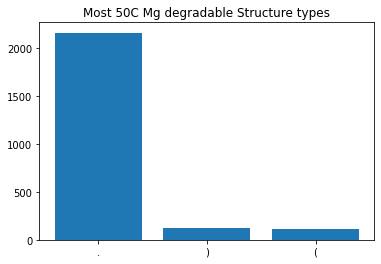

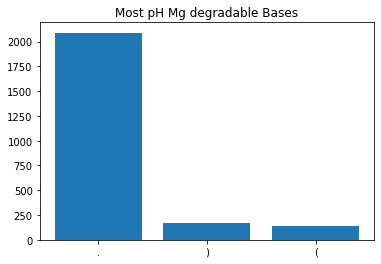

In [16]:
x = new_df['struct']
y = list(new_df['number'])

fig, ax = plt.subplots()
plt.title('Most 50C Mg degradable Structure types')
plt.bar(x, y)
plt.show()

x2 = new_df2['struct']
y2 = list(new_df2['number'])

fig, ax = plt.subplots()
plt.title('Most pH Mg degradable Bases')
plt.bar(x2, y2)
plt.show()

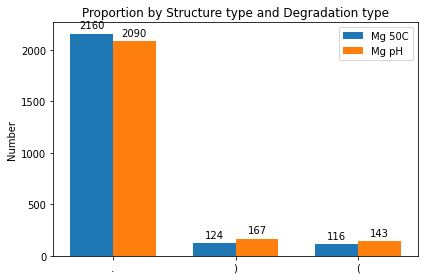

In [17]:
labels = new_df['struct']
mg50c = list(new_df['number'])
mgph = list(new_df2['number'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mg50c, width, label='Mg 50C')
rects2 = ax.bar(x + width/2, mgph, width, label='Mg pH')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number')
ax.set_title('Proportion by Structure type and Degradation type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

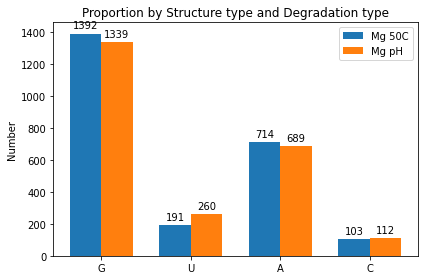

In [18]:
new_df3 = pd.DataFrame(d_base_50c.items(), columns=['base', 'number'])

new_df4 = pd.DataFrame(d_base_ph.items(), columns=['base', 'number'])

labels = new_df3['base']
mg50c = list(new_df3['number'])
mgph = list(new_df4['number'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mg50c, width, label='Mg 50C')
rects2 = ax.bar(x + width/2, mgph, width, label='Mg pH')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number')
ax.set_title('Proportion by Structure type and Degradation type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()